# Human Model Generation Tutorial

This notebook provides a tutorial for generate a 3D human model from a single image using the ```PIFuGeneratorLearner```, extract the 3D model's 3D pose, get renderings of the 3D model from various views and visualize the renderings. <br /> <br />

First we load the loader ```PIFuGeneratorLearner``` along with the other modules needed for this demo.

In [10]:
import sys
import cv2
import os
from opendr.engine.data import Image
from opendr.simulation.human_model_generation.pifu_generator_learner import PIFuGeneratorLearner
import matplotlib.pyplot as plt
import numpy as np
current_dir = os.getcwd()

We load a full-body image of a human as well as an image depicting its corresponding silhouette. <br />
The images are also visualized in the demo.

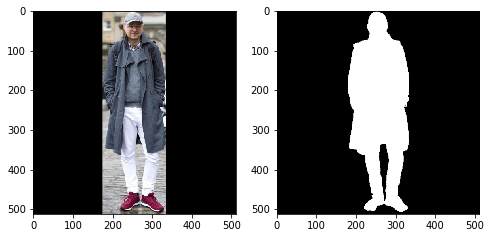

In [11]:
rgb_img = Image(cv2.imread(os.path.join(current_dir,'imgs_input/rgb/result_0004.jpg')))
msk_img = Image(cv2.imread(os.path.join(current_dir,'imgs_input/msk/result_0004.jpg')))
%matplotlib inline
f, axarr = plt.subplots(1,2,figsize=(8,8))
axarr[0].imshow(rgb_img.numpy()[:,:,::-1])
axarr[1].imshow(msk_img.numpy()[:,:,::-1])

We create the human model generator and using the ```infer``` method we generated human 3D model. <br />
The 3D pose of the human is also extracted by setting the setting the ```extract_pose``` parameter to True in the ```infer``` method.

In [3]:
model_generator = PIFuGeneratorLearner(device='cuda', checkpoint_dir='./temp')
[model_3D, human_pose_3D] = model_generator.infer(imgs_rgb=[rgb_img], imgs_msk=[msk_img], extract_pose=True)
#model_3D = model_generator.infer(imgs_rgb=[rgb_img], imgs_msk=[msk_img])

PIFu model is loaded.
Metadata json file already exists.
Trained model .pth file already exists.
Pretrained model download complete.


We get renderings of the 3D model from various yaw angles. <br>
The 2D pose of the depicted human is also computed in each rendering by providing the 3D pose of the human to the ```get_img_views``` method. <br>
Finally, the keypoints of the 2D pose are also visualized in each rendering by setting the ```plot_kps``` parameter to True in the infer method.

In [5]:
rotations = [0, 45, 90, 180]
[out_imgs, human_pose_2D] = model_3D.get_img_views(rotations=rotations, human_pose_3D=human_pose_3D, plot_kps=True)
#out_imgs = model_3D.get_imgs_views(rotations = rotations)

We visualize the various renderings of the human with the keypoints of the 2D pose also depicted.

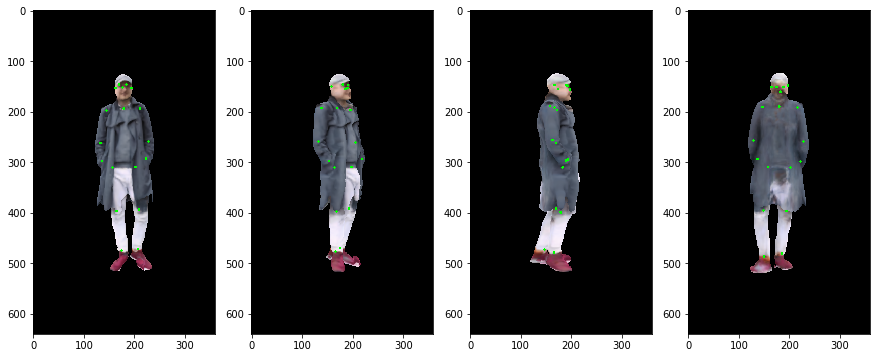

In [12]:
f, axarr = plt.subplots(1, 4, figsize=(15,15))
axarr[0].imshow(out_imgs[0].numpy()[:,:,::-1])
axarr[1].imshow(out_imgs[1].numpy()[:,:,::-1])
axarr[2].imshow(out_imgs[2].numpy()[:,:,::-1])
axarr[3].imshow(out_imgs[3].numpy()[:,:,::-1])